In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import t
draws = 100000

In [2]:
clicks = pd.read_excel('clicks.xlsx', index_col=0)
clicks = clicks.T
clicks['s'] = clicks.clicks
clicks['f'] = clicks.exposures - clicks.clicks
clicks['beta_s'] = clicks.s + 1
clicks['beta_f'] = clicks.f + 1

volume = pd.read_excel('volume.xlsx', index_col=0)

Task 1

In [3]:
ctr_sim = pd.DataFrame(index = range(draws))

for i in range(len(clicks)):
    ctr_sim['ad' + str(i + 1)] = beta.rvs(clicks.beta_s.iloc[i], clicks.beta_f.iloc[i], size = draws)

ctr_sim['admax'] = ctr_sim.idxmax(axis = 1)
ctr_sim.admax.value_counts() / len(ctr_sim)

admax
ad1    0.46843
ad3    0.39657
ad4    0.11876
ad2    0.01622
ad5    0.00002
Name: count, dtype: float64

Task 2

In [4]:
vol_sim = pd.DataFrame(index = range(draws))

for i in range(len(clicks)):
    sample_mean = volume.loc[volume.ad == i + 1, 'volume'].mean()
    sample_se = volume.loc[volume.ad == i + 1, 'volume'].std() / np.sqrt(len(volume.loc[volume.ad == i + 1]))
    dof = len(volume.loc[volume.ad == i + 1]) + 1
    vol_sim['ad' + str(i + 1)] = t.rvs(dof, size = draws) * sample_se + sample_mean

vol_sim['admax'] = vol_sim.idxmax(axis = 1)
vol_sim.admax.value_counts() / len(vol_sim)

admax
ad5    0.99998
ad2    0.00002
Name: count, dtype: float64

Task 3

In [5]:
evi_sim = pd.DataFrame(index = range(draws))

for i in range(len(clicks)):
    evi_sim['ad' + str(i + 1)] = ctr_sim['ad' + str(i + 1)] * vol_sim['ad' + str(i + 1)]

evi_sim['admax'] = evi_sim.idxmax(axis = 1)
evi_sim.admax.value_counts() / len(evi_sim)

admax
ad5    0.34052
ad2    0.19969
ad1    0.16737
ad4    0.15935
ad3    0.13307
Name: count, dtype: float64

In [6]:
clicks['vol'] = volume.groupby('ad').volume.mean()
clicks['evi'] = clicks.clicks * clicks.vol
clicks

ad,clicks,exposures,s,f,beta_s,beta_f,vol,evi
1,52,1000,52,948,53,949,42.076923,2188.0
2,38,1000,38,962,39,963,57.289474,2177.0
3,51,1000,51,949,52,950,41.803922,2132.0
4,45,1000,45,955,46,956,47.888889,2155.0
5,25,1000,25,975,26,976,90.640000,2266.0


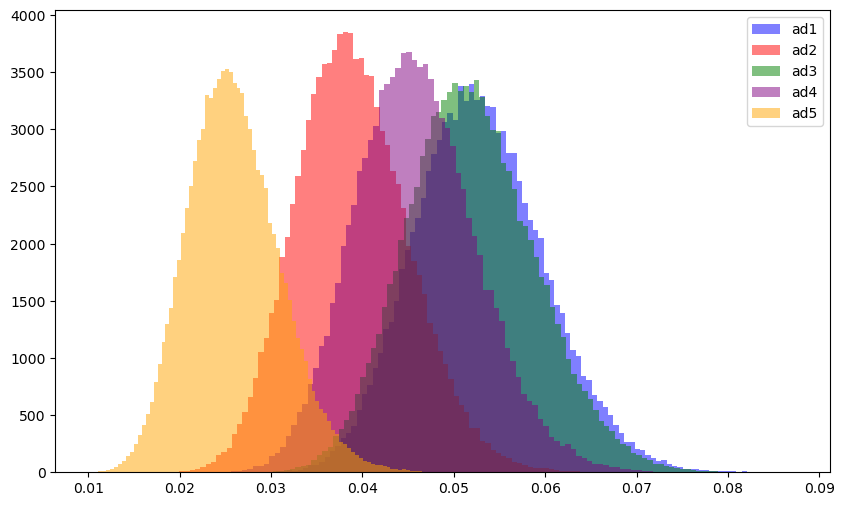

In [7]:
#plot ctr
plt.figure(figsize = (10, 6))
plt.hist(ctr_sim.ad1, bins = 100, alpha = 0.5, label = 'ad1', color = 'blue')
plt.hist(ctr_sim.ad2, bins = 100, alpha = 0.5, label = 'ad2', color = 'red')
plt.hist(ctr_sim.ad3, bins = 100, alpha = 0.5, label = 'ad3', color = 'green')
plt.hist(ctr_sim.ad4, bins = 100, alpha = 0.5, label = 'ad4', color = 'purple')
plt.hist(ctr_sim.ad5, bins = 100, alpha = 0.5, label = 'ad5', color = 'orange')

plt.legend()
plt.show()

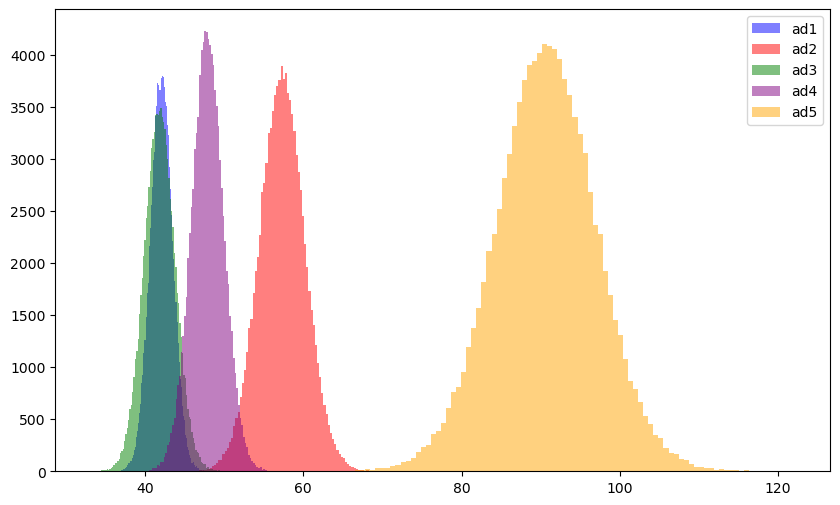

In [8]:
#plot evi
plt.figure(figsize = (10, 6))
plt.hist(vol_sim.ad1, bins = 100, alpha = 0.5, label = 'ad1', color = 'blue')
plt.hist(vol_sim.ad2, bins = 100, alpha = 0.5, label = 'ad2', color = 'red')
plt.hist(vol_sim.ad3, bins = 100, alpha = 0.5, label = 'ad3', color = 'green')
plt.hist(vol_sim.ad4, bins = 100, alpha = 0.5, label = 'ad4', color = 'purple')
plt.hist(vol_sim.ad5, bins = 100, alpha = 0.5, label = 'ad5', color = 'orange')

plt.legend()
plt.show()

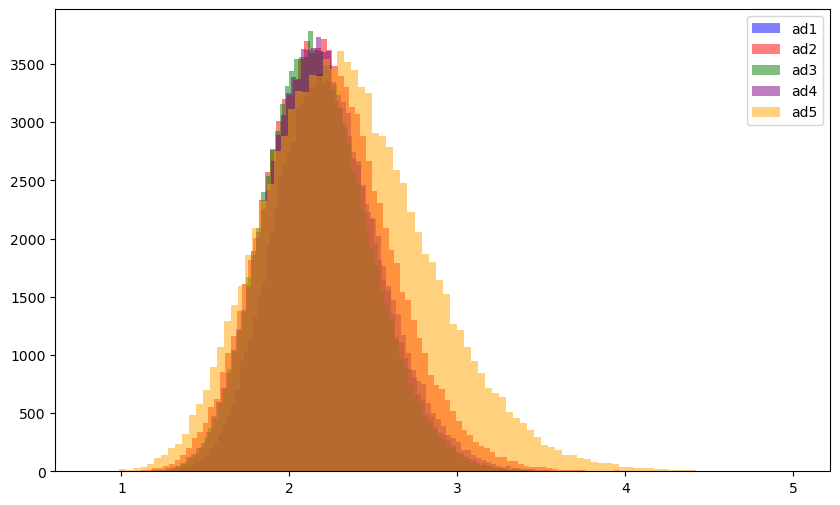

In [9]:
#plot evi
plt.figure(figsize = (10, 6))
plt.hist(evi_sim.ad1, bins = 100, alpha = 0.5, label = 'ad1', color = 'blue')
plt.hist(evi_sim.ad2, bins = 100, alpha = 0.5, label = 'ad2', color = 'red')
plt.hist(evi_sim.ad3, bins = 100, alpha = 0.5, label = 'ad3', color = 'green')
plt.hist(evi_sim.ad4, bins = 100, alpha = 0.5, label = 'ad4', color = 'purple')
plt.hist(evi_sim.ad5, bins = 100, alpha = 0.5, label = 'ad5', color = 'orange')

plt.legend()
plt.show()